In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/DA Project datasets/iot_resource_allocation_dataset.csv')

# Display first few rows
data.head()


,Timestamp,Device_ID,Sensor_Data,Workload_Type,Processing_Tier,CPU_Usage(%),Memory_Usage(MB),Network_Latency(ms),Jitter(ms),Task_Execution_Time(ms),Predicted_Resource_Allocation(%),Actual_Resource_Allocation(%),Target
0,2024-03-25 12:00:00,D14,"Temp: 32°C, Humidity: 72%",Data Analytics,Device,24,2276,29,8,189,54,51,0
1,2024-03-25 12:00:10,D5,"Temp: 22°C, Humidity: 61%",Data Analytics,Device,57,6812,9,2,216,57,55,1
2,2024-03-25 12:00:20,D7,"Temp: 20°C, Humidity: 33%",Image Processing,Device,26,5004,8,3,185,52,56,0
3,2024-03-25 12:00:30,D18,"Temp: 26°C, Humidity: 45%",Data Analytics,Cloud,24,4455,16,5,72,58,56,1
4,2024-03-25 12:00:40,D1,"Temp: 23°C, Humidity: 46%",Image Processing,Cloud,27,5855,39,7,282,56,56,1


In [ ]:
# Convert Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Check for missing values
missing_data = data.isnull().sum()

# Check data types
data_types = data.dtypes

# Summary statistics
summary_stats = data.describe()

# Display preprocessing results
print(missing_data)
print(data_types)
print(summary_stats)


Timestamp                           0
Device_ID                           0
Sensor_Data                         0
Workload_Type                       0
Processing_Tier                     0
CPU_Usage(%)                        0
Memory_Usage(MB)                    0
Network_Latency(ms)                 0
Jitter(ms)                          0
Task_Execution_Time(ms)             0
Predicted_Resource_Allocation(%)    0
Actual_Resource_Allocation(%)       0
Target                              0
dtype: int64
Timestamp                           datetime64[ns]
Device_ID                                   object
Sensor_Data                                 object
Workload_Type                               object
Processing_Tier                             object
CPU_Usage(%)                                 int64
Memory_Usage(MB)                             int64
Network_Latency(ms)                          int64
Jitter(ms)                                   int64
Task_Execution_Time(ms)           

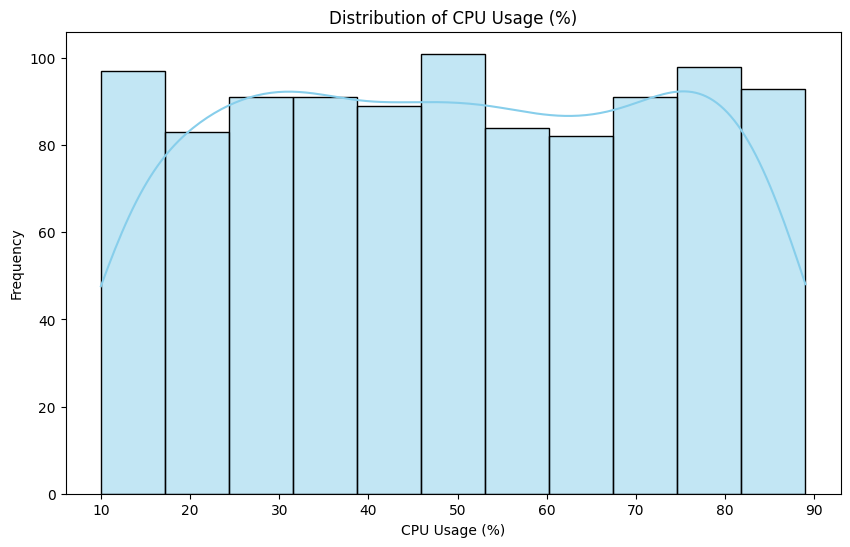

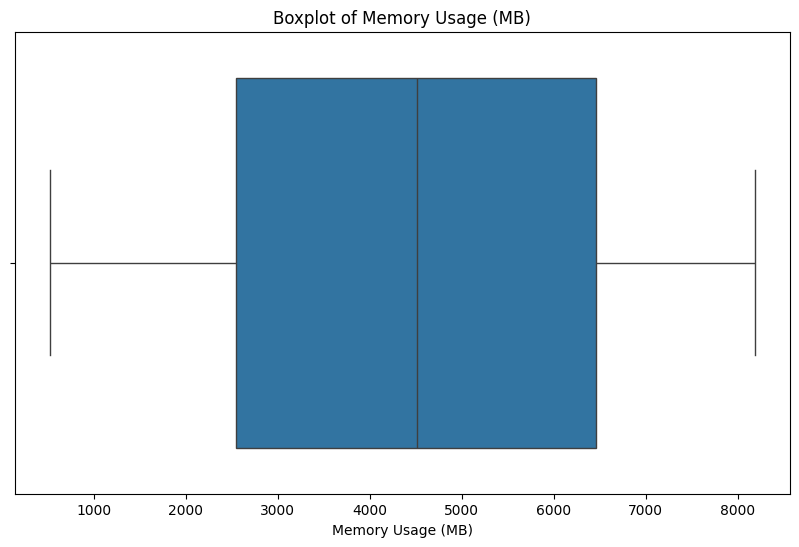

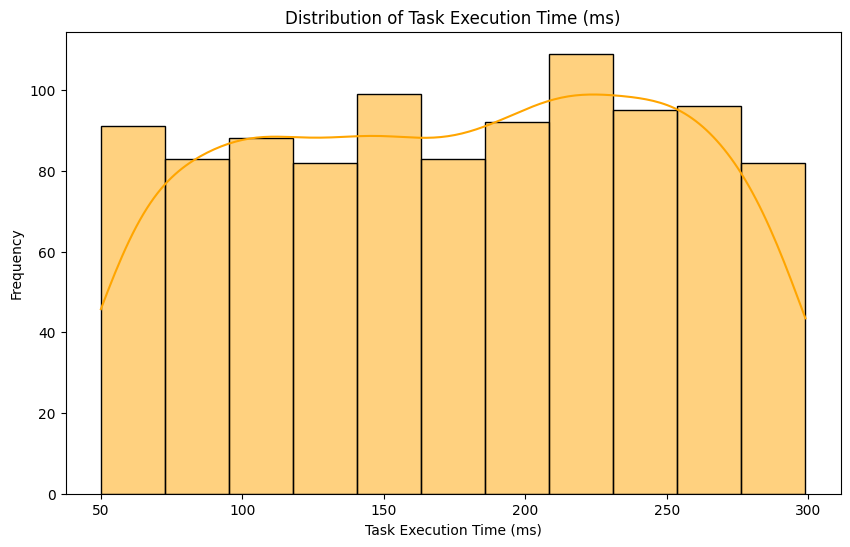

In [ ]:
# Plot histogram for CPU Usage
plt.figure(figsize=(10, 6))
sns.histplot(data['CPU_Usage(%)'], kde=True, color='skyblue')
plt.title('Distribution of CPU Usage (%)')
plt.xlabel('CPU Usage (%)')
plt.ylabel('Frequency')
plt.show()

# Plot boxplot for Memory Usage
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Memory_Usage(MB)'])
plt.title('Boxplot of Memory Usage (MB)')
plt.xlabel('Memory Usage (MB)')
plt.show()

# Plot histogram for Task Execution Time
plt.figure(figsize=(10, 6))
sns.histplot(data['Task_Execution_Time(ms)'], kde=True, color='orange')
plt.title('Distribution of Task Execution Time (ms)')
plt.xlabel('Task Execution Time (ms)')
plt.ylabel('Frequency')
plt.show()


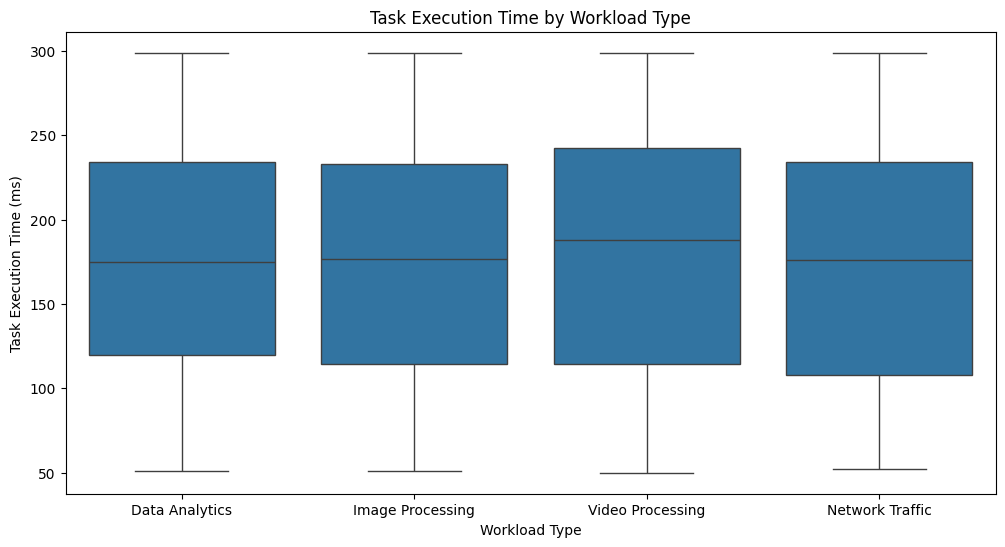

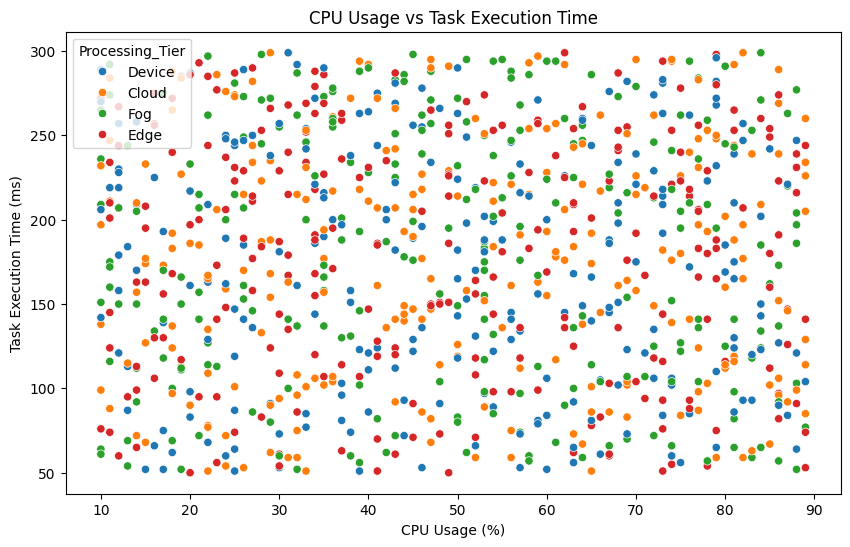

In [ ]:
# Compare Task Execution Time across different Workload Types
plt.figure(figsize=(12, 6))
sns.boxplot(x='Workload_Type', y='Task_Execution_Time(ms)', data=data)
plt.title('Task Execution Time by Workload Type')
plt.xlabel('Workload Type')
plt.ylabel('Task Execution Time (ms)')
plt.show()

# Scatter plot between CPU Usage and Task Execution Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPU_Usage(%)', y='Task_Execution_Time(ms)', data=data, hue='Processing_Tier')
plt.title('CPU Usage vs Task Execution Time')
plt.xlabel('CPU Usage (%)')
plt.ylabel('Task Execution Time (ms)')
plt.show()


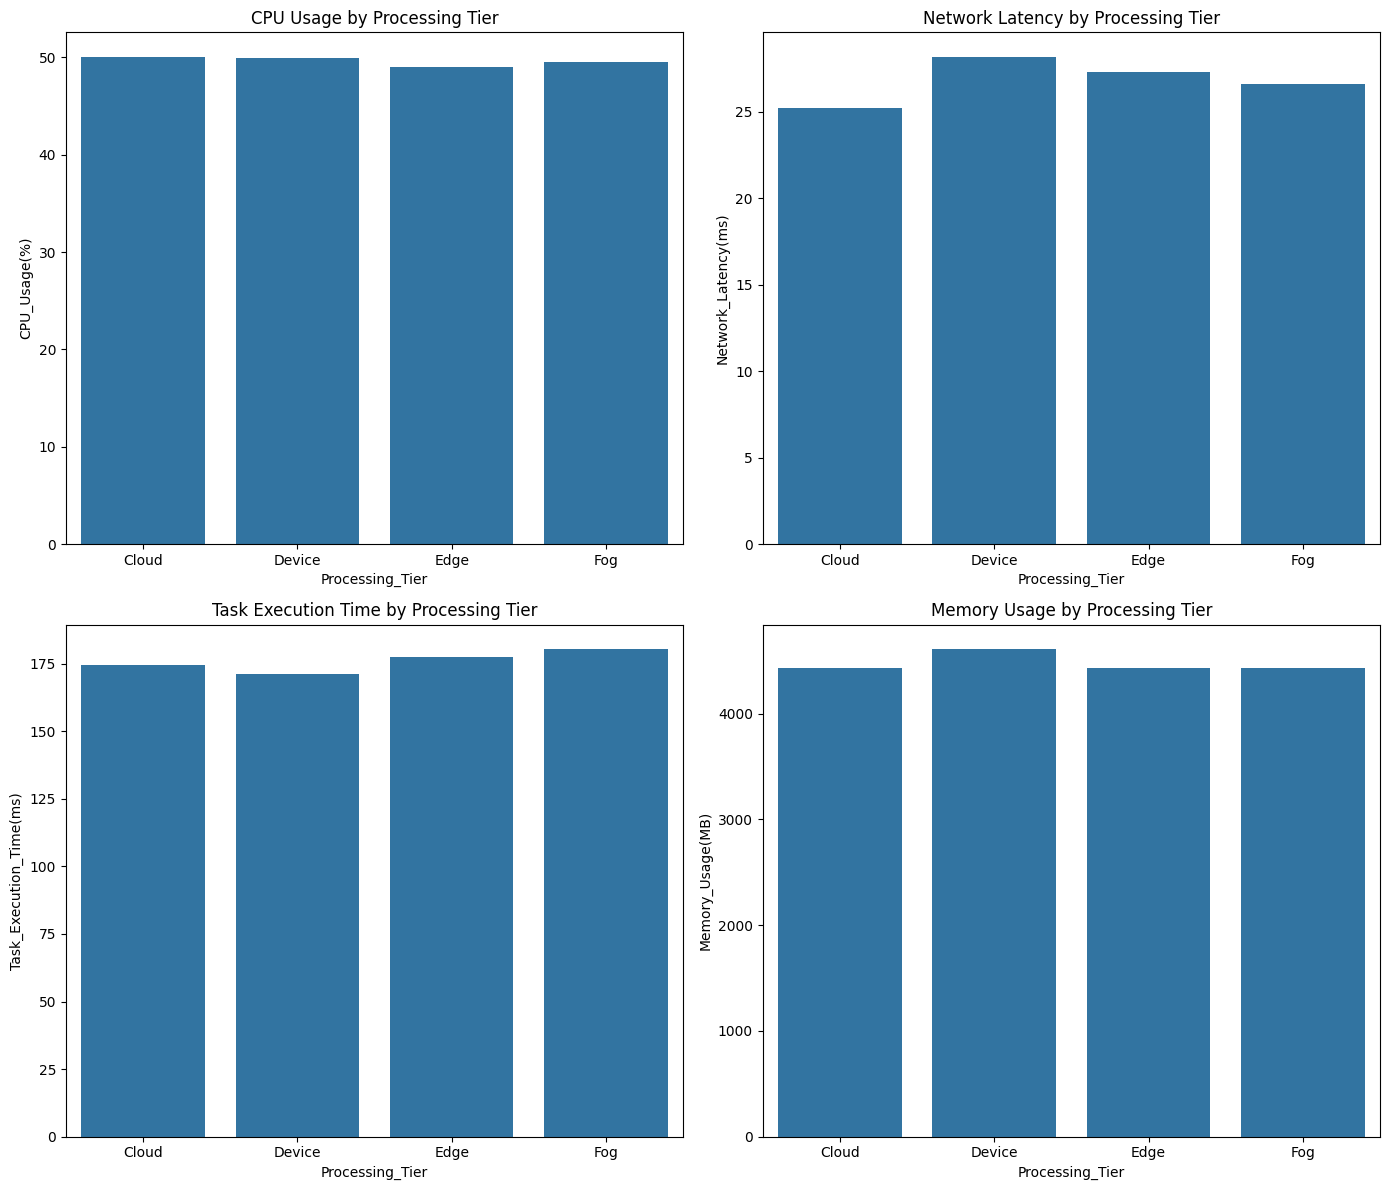

In [ ]:
# Group by Processing_Tier (Fog vs Cloud) and calculate mean for key metrics
fog_cloud_comparison = data.groupby('Processing_Tier').agg({
    'CPU_Usage(%)': 'mean',
    'Network_Latency(ms)': 'mean',
    'Task_Execution_Time(ms)': 'mean',
    'Memory_Usage(MB)': 'mean'
}).reset_index()

# Plot comparisons using bar plots
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

sns.barplot(x='Processing_Tier', y='CPU_Usage(%)', data=fog_cloud_comparison, ax=ax[0, 0])
ax[0, 0].set_title('CPU Usage by Processing Tier')

sns.barplot(x='Processing_Tier', y='Network_Latency(ms)', data=fog_cloud_comparison, ax=ax[0, 1])
ax[0, 1].set_title('Network Latency by Processing Tier')

sns.barplot(x='Processing_Tier', y='Task_Execution_Time(ms)', data=fog_cloud_comparison, ax=ax[1, 0])
ax[1, 0].set_title('Task Execution Time by Processing Tier')

sns.barplot(x='Processing_Tier', y='Memory_Usage(MB)', data=fog_cloud_comparison, ax=ax[1, 1])
ax[1, 1].set_title('Memory Usage by Processing Tier')

plt.tight_layout()
plt.show()


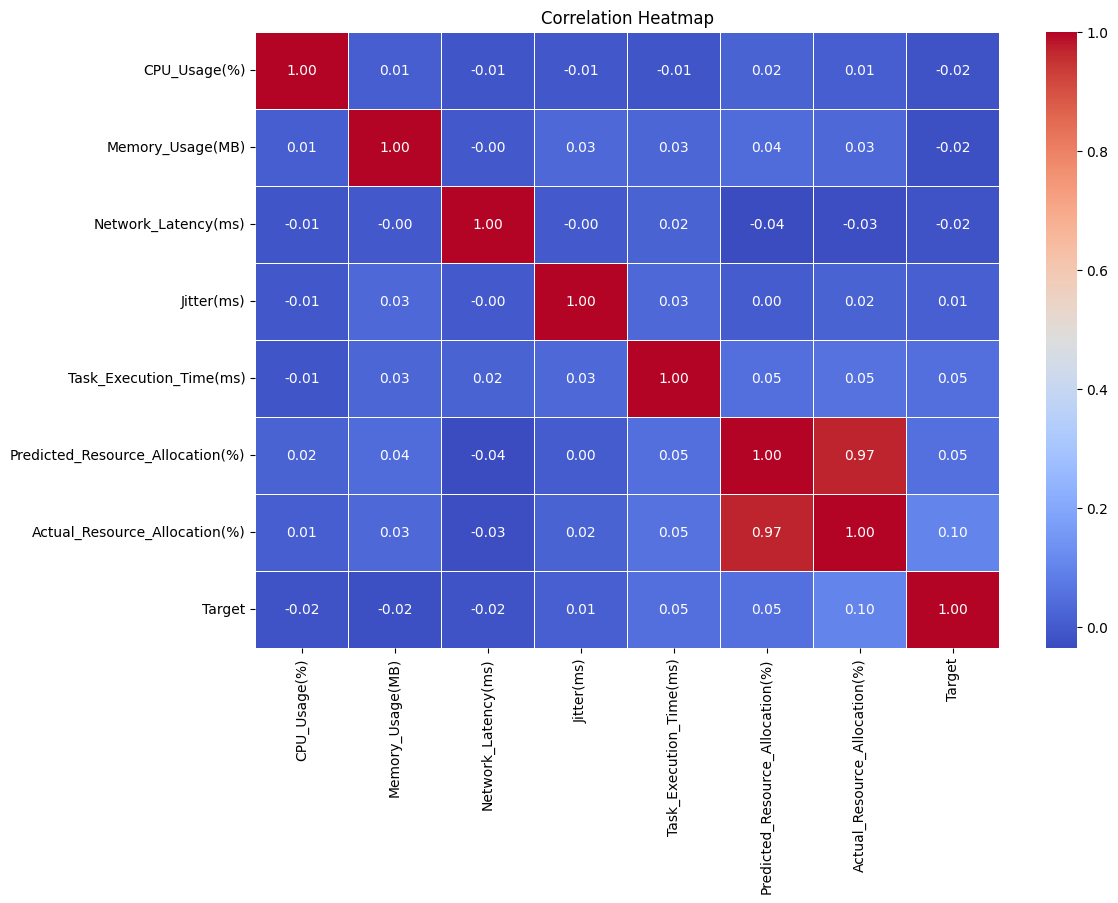

In [ ]:
# Compute correlation matrix
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Save cleaned dataset
data.to_csv("iot_cleaned.csv", index=False)

# Download it
from google.colab import files
files.download("iot_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>